<a href="https://colab.research.google.com/github/AmandinChyba/Project1-Fields-2022/blob/main/Background_Learning_Questions/p4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
# imports
import jax
import jax.numpy as jnp
import time
import math
import matplotlib.pyplot as plt

In [125]:
# part 1a
# f(x) = exp(-10|x|) for x in [-1, 1]

def compute(N: int, chebyshev=False):
  # place nodes
  x_n = jnp.arange(N+1)
  if not chebyshev:
    x_n = -1 + (2 * x_n / N)
  else:
    x_n = jnp.cos(math.pi * x_n / N)

  # compute lambda_n
  diffs = x_n - x_n[jnp.newaxis].T
  diffs = diffs[~jnp.eye(x_n.shape[0], dtype=bool)].reshape(x_n.shape[0], -1)
  lambda_n = 1 / jnp.prod(diffs, axis=1)

  # create x values to interpolate
  X = jnp.arange(-1, 1 + 1/(50 * N), 1/(50 * N))

  # evaluate f(x)
  F = jnp.exp(-10 * jnp.abs(X))

  # evaluate p_n(x)
  X = X[jnp.newaxis].T
  lambda_n = jnp.tile(lambda_n, (len(X), 1))
  # compute denomerator
  denom = jnp.sum(lambda_n / (X - x_n), axis=1)
  # compute numerator
  numer = jnp.sum((lambda_n * jnp.exp(-10 * jnp.abs(x_n))) / (X - x_n), axis=1)
  P = jnp.divide(numer, denom)

  # compute max
  m = jnp.max(jnp.nan_to_num(jnp.abs(F - P)))

  return m, F, P

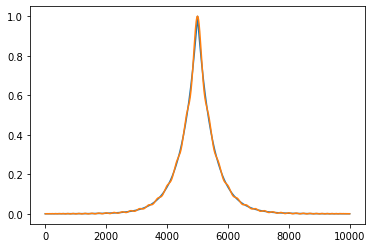

In [140]:
# run
N = 100
m, F, P = compute(N, chebyshev=True)

plt.plot(F)
plt.plot(P)
plt.show()